In [20]:
# Data manipulation
import pandas as pd  
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
%matplotlib inline

# Data spliting and feature selections
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Regression algorithms
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Regression metrices
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
tempo = pd.read_csv('./soil_balanced_v1.csv')

x = tempo.drop(columns=['N2O'])
y = tempo['N2O']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=556)

In [3]:
from datetime import datetime

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\nTime taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 3)))

In [4]:
cv = 5         # CV value
algo = []      # algorithm name
r_2 = []       # R2 score (test)
CV = []        # CV scores mean
mae_value = [] # mae score
mse_value = [] # mse score
rmse_val = []  # rmse score
r2 = []        # R2 scorw (train)

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_):
    start_time = timer(None)
    
    algorithm.fit(x_train_,y_train_)
    
    predicts = algorithm.predict(x_test_)
    
    prediction=pd.DataFrame(predicts, columns=['Prediction'])
    
    R2 = algorithm.score(x_train_,y_train_)
    R_2 = r2_score(y_test_,prediction)
    
    cross_val = cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    
    mae = mean_absolute_error(y_test_, predicts)
    mse = mean_squared_error(y_test_, predicts)
    rmse = np.sqrt(mean_squared_error(y_test_, predicts))
    
    # Appending results to Lists
    algo.append(algorithm)
    r2.append(R2) 
    CV.append(cross_val.mean()) 
    r_2.append(R_2)
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_val.append(rmse)
    
    # Printing results  
    print('ML Algorithm     :', algorithm) 
    print("R2 Score (train) :", R2)
    print("R2 Score (test)  :", R_2)
    print("CV Scores        :", cross_val,4)
    print("CV Scores mean   :", cross_val.mean())
    print("MAE rate         :", mae)
    print("MSE rate         :", mse)
    print("RMSE rate        :", rmse)
                   
    # Plot for prediction vs originals
    test_index = y_test_.reset_index()["N2O"]
    
    ax = test_index.plot(label="originals",figsize=(12,5),linewidth=2,color="r")
    ax = prediction['Prediction'].plot(label = "predictions",figsize=(12,6),linewidth=2,color="b")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()
    
    timer(start_time)

ML Algorithm     : LinearRegression()
R2 Score (train) : 0.2473413398980121
R2 Score (test)  : 0.11653277216598024
CV Scores        : [ 0.24639576  0.26085194 -0.11750359  0.05030906 -0.01773396] 4
CV Scores mean   : 0.0844638430639921
MAE rate         : 6.106651878850717
MSE rate         : 204.37859026801965
RMSE rate        : 14.296104024104597


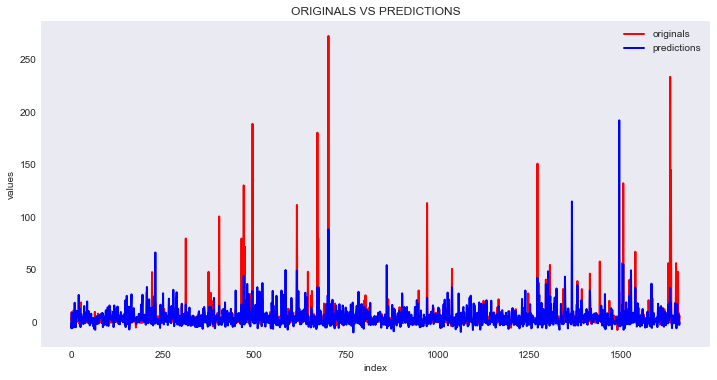


Time taken: 0 hours 0 minutes and 1.022 seconds.
Wall time: 1.02 s


In [5]:
%%time
lr = LinearRegression()
model(lr,X_train,Y_train,X_test,Y_test)

ML Algorithm     : RandomForestRegressor()
R2 Score (train) : 0.901820839090956
R2 Score (test)  : 0.48583628311655724
CV Scores        : [-0.22481863  0.48120514 -0.04497663  0.12708947 -0.27732873] 4
CV Scores mean   : 0.012234121715101387
MAE rate         : 2.192521828682114
MSE rate         : 118.94505230401795
RMSE rate        : 10.90619330032335


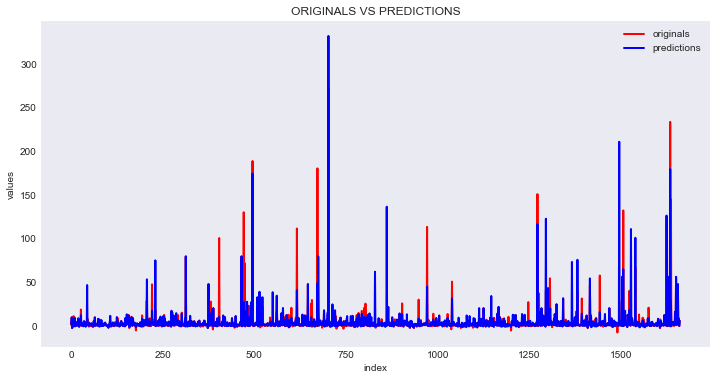


Time taken: 0 hours 0 minutes and 35.658 seconds.
Wall time: 35.7 s


In [6]:
%%time
rf = RandomForestRegressor()
model(rf,X_train,Y_train,X_test,Y_test)

ML Algorithm     : DecisionTreeRegressor()
R2 Score (train) : 1.0
R2 Score (test)  : -0.24817373860463543
CV Scores        : [-0.30951356  0.30532681 -0.59204098 -0.23280269 -2.89985266] 4
CV Scores mean   : -0.7457766165468737
MAE rate         : 2.6268610462369497
MSE rate         : 288.7486723542683
RMSE rate        : 16.992606402617238


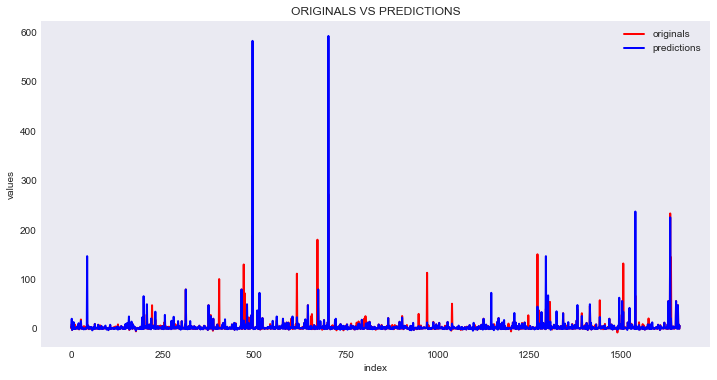


Time taken: 0 hours 0 minutes and 1.155 seconds.
Wall time: 1.16 s


In [7]:
%%time
dt = DecisionTreeRegressor()
model(dt,X_train,Y_train,X_test,Y_test)

ML Algorithm     : SVR()
R2 Score (train) : -0.016893800229440092
R2 Score (test)  : -0.01769073700553525
CV Scores        : [-0.0412582  -0.01866    -0.03291137 -0.01136867 -0.02110584] 4
CV Scores mean   : -0.02506081739951136
MAE rate         : 3.8774956642889
MSE rate         : 235.42944390585802
RMSE rate        : 15.343710239243245


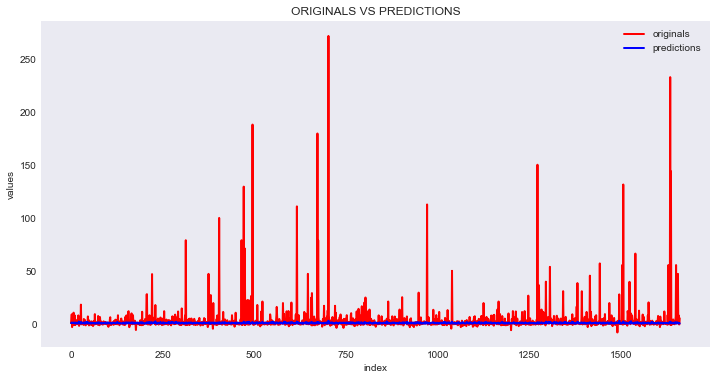


Time taken: 0 hours 0 minutes and 10.568 seconds.
Wall time: 10.6 s


In [8]:
%%time
sv = SVR()
model(sv,X_train,Y_train,X_test,Y_test)

ML Algorithm     : KNeighborsRegressor()
R2 Score (train) : 0.5640552557452684
R2 Score (test)  : 0.4573886328500554
CV Scores        : [0.53054013 0.34009321 0.20646154 0.07689105 0.43260928] 4
CV Scores mean   : 0.31731904028133345
MAE rate         : 2.286011463343244
MSE rate         : 125.52604418999837
RMSE rate        : 11.20384059999063


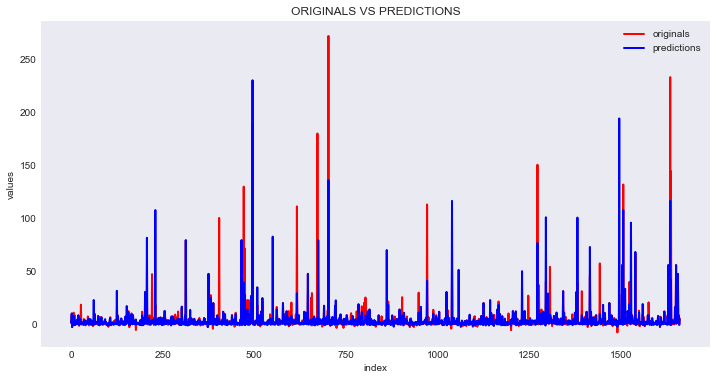


Time taken: 0 hours 0 minutes and 1.088 seconds.
Wall time: 1.09 s


In [9]:
%%time
kn = KNeighborsRegressor()
model(kn,X_train,Y_train,X_test,Y_test)

ML Algorithm     : GradientBoostingRegressor()
R2 Score (train) : 0.9092669890142981
R2 Score (test)  : 0.4830535878807398
CV Scores        : [-0.89670435  0.41688212 -0.80997527  0.17399157 -0.42238996] 4
CV Scores mean   : -0.30763917899289905
MAE rate         : 3.4892913169367024
MSE rate         : 119.58879245817874
RMSE rate        : 10.935666072909266


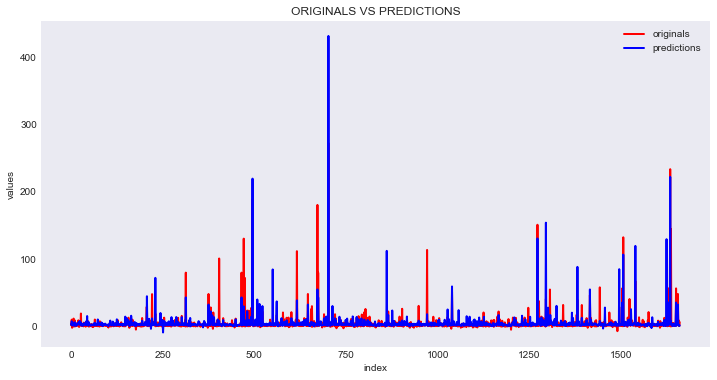


Time taken: 0 hours 0 minutes and 8.425 seconds.
Wall time: 8.43 s


In [10]:
%%time
gb = GradientBoostingRegressor()
model(gb,X_train,Y_train,X_test,Y_test)

ML Algorithm     : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
R2 Score (train) : 0.9984473175222576
R2 Score (test)  : 0.5698969915466552
CV Scores        : [-2.11151981  0.57928476 -0.68121838  0.23190862 -0.54905053] 4
CV Scores mean   : -0.5061190685935797
MAE rate         : 2.2926698835424566
MSE rate         : 99.49870665065983
RMSE rate        : 9.974903841674857


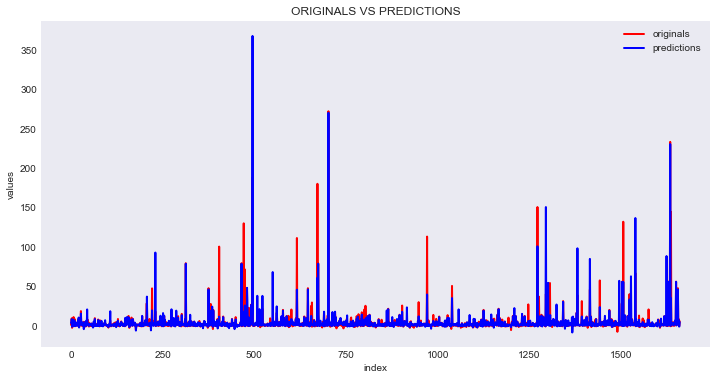


Time taken: 0 hours 0 minutes and 5.79 seconds.
Wall time: 5.79 s


In [11]:
%%time
xg = XGBRegressor()
model(xg,X_train,Y_train,X_test,Y_test)

In [12]:
Model_interpretion = pd.DataFrame(list(zip(algo, r2, CV, r_2, mae_value, mse_value, rmse_val)),
    columns =['ML Algorithms', 'Training Score', 'CV Mean Score', 'Testing score', 'MAE Rate', 'MSE Rate', 'RMSE Rate'])

In [15]:
Model_interpretion.sort_values(by='Testing score', ascending=False)

,ML Algorithms,Training Score,CV Mean Score,Testing score,MAE Rate,MSE Rate,RMSE Rate
6,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.998447,-0.506119,0.569897,2.292670,99.498707,9.974904
1,"(DecisionTreeRegressor(max_features='auto', ra...",0.901821,0.012234,0.485836,2.192522,118.945052,10.906193
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.909267,-0.307639,0.483054,3.489291,119.588792,10.935666
4,KNeighborsRegressor(),0.564055,0.317319,0.457389,2.286011,125.526044,11.203841
0,LinearRegression(),0.247341,0.084464,0.116533,6.106652,204.378590,14.296104
3,SVR(),-0.016894,-0.025061,-0.017691,3.877496,235.429444,15.343710
2,DecisionTreeRegressor(),1.000000,-0.745777,-0.248174,2.626861,288.748672,16.992606


In [31]:
%%time

params = {
    'learning_rate': np.linspace(0.1,0.5,5),
    'n_estimators': [400, 800, 1500],
    'max_depth': [3, 5, 8],
    'min_child_weight': [1, 2, 3],
    'num_parallel_tree': [1, 2] 
}

# instantiate the model
xgb_boosting = XGBRegressor()

# perform the grid search for the best parameters
start_time = timer(None)
gboost_search = RandomizedSearchCV(xgb_boosting, param_distributions=params, n_jobs=-1, cv=5, verbose=2)
gboost_search.fit(X_train,Y_train)

timer(start_time)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.0min finished



Time taken: 0 hours 4 minutes and 11.257 seconds.
Wall time: 4min 11s


In [34]:
print(gboost_search.best_estimator_)
print(gboost_search.best_params_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.30000000000000004,
             max_delta_step=0, max_depth=5, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=4,
             num_parallel_tree=2, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
{'num_parallel_tree': 2, 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.30000000000000004}
